## Import Dataset

In [1]:
import pandas as pd

data = pd.read_csv('data/black_friday/train.csv')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## Data Analysis

### Parameters

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [3]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


### Gender Distribution

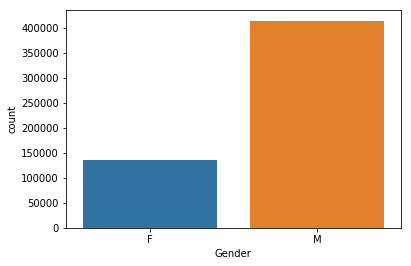

In [4]:
import seaborn as sns

sns.countplot(data['Gender'])

### Gender and Age Distribution

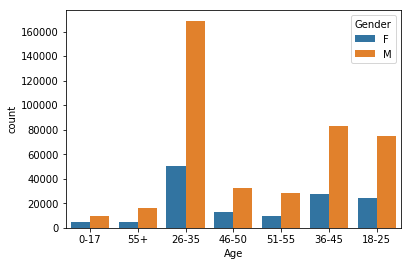

In [5]:
sns.countplot(data['Age'], hue=data['Gender'])

### Customers and Products

In [6]:
data['User_ID'].nunique()

5891

In [7]:
data['Product_ID'].nunique()

3631

### Money spent based on Occupations

In [8]:
import numpy as np

occupation = np.unique(np.array(data['Occupation']))
print('Number of different occupations [Occupation ID]:')
print(occupation)

Number of different occupations [Occupation ID]:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [9]:
money_spent = []
for occ in occupation:
    mon = data[data['Occupation']==occ]['Purchase'].sum()
    money_spent.append(mon)

print(money_spent)

[635406958, 424614144, 238028583, 162002168, 666244484, 113649759, 188416784, 557371587, 14737388, 54340046, 115844465, 106751618, 305449446, 71919481, 259454692, 118960211, 238346955, 393281453, 60721461, 73700617, 296570442]


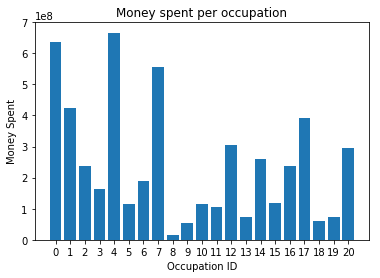

In [10]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(occupation, money_spent)
plt.title('Money spent per occupation')
plt.xlabel('Occupation ID')
plt.xticks(np.arange(len(occupation)))
plt.ylabel('Money Spent')
plt.show()

### City Distribution

In [11]:
data['City_Category'].nunique()

3

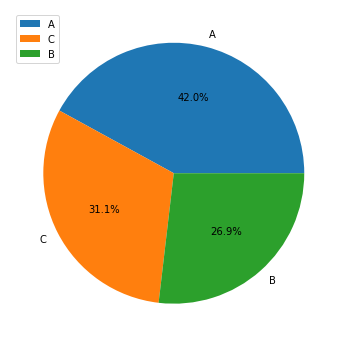

In [12]:
plt.figure(figsize=(11,6))
d = data['City_Category']
plt.pie(d.value_counts(), labels=d.unique(), autopct='%1.1f%%')
plt.legend()
plt.show()